<a href="https://colab.research.google.com/github/DAHYUN-HAN/deeplearning/blob/master/CNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import keras
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [134]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

newtest_images = np.load('test_data.npy')
newtest_labels = np.load('test_label.npy')

print(newtest_images.shape)
print(newtest_labels.shape)
print(newtest_labels[0])

newtest_images = newtest_images.astype('float32')
newtest_images = newtest_images.reshape((39, 28, 28))
newtest_images = newtest_images.astype('float32')/255
print(newtest_images.shape)

(39, 28, 28, 1)
(39, 3)
[1. 0. 0.]
(39, 28, 28)


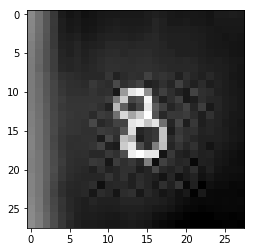

[0. 0. 1.]


In [135]:
import matplotlib.pyplot as plt
ndigit = newtest_images[5]

plt.imshow(ndigit, cmap=plt.cm.binary)
plt.show()

print(newtest_labels[5])

In [136]:
from keras.utils import to_categorical
newtest_images = newtest_images.reshape((39, 28, 28, 1))
c = 39
i=0
newtest_newlabels = [0]*40
while c:
  if(newtest_labels[i][0]==1.0):
    newtest_newlabels[i]=3
  elif(newtest_labels[i][1]==1.0):
    newtest_newlabels[i]=6
  elif(newtest_labels[i][2]==1.0):
    newtest_newlabels[i]=8
  c-=1
  i+=1
    
newtest_newlabels[39] = 9
newtest_newlabels = to_categorical(newtest_newlabels)
newtest_newlabels=np.delete(newtest_newlabels,[39,40],axis=0) 

print(newtest_newlabels.shape)

(39, 10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


In [137]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = 1-(train_images.astype('float32')/255)

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = 1-(test_images.astype('float32')/255)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(test_labels.shape)
print(test_labels[0])

(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
from skimage.filters import gaussian
from skimage.util import random_noise
import random

def randRange(a, b):
    return np.random.rand() * (b - a) + a

def randomGaussian(im):
    return gaussian(im, sigma=randRange(0, 1))

def randomNoise(im):
    var = randRange(0.001, 0.013)
    return random_noise(im, var=var)

def randomRescale(im):
  r1 = randRange(0.1,0.5)
  r2 = randRange(0.1,0.4)
  im1 = (im == 1) * r1
  im2 = (im < 0.5) * (im+r2)
  im = im1 + im2
  return im

def randomRescale2(im):
  r=randRange(0.5,0.8)
  im = im+(1-im)*r
  return im

def augment(im, Steps= [randomGaussian, randomNoise, randomRescale, randomRescale2]):
    i= np.random.randint(4)
    step = Steps[i]
    im = step(im)
    return im

In [139]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

# 데이터 제너레이터

from keras.preprocessing.image import ImageDataGenerator 
    
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    fill_mode='reflect',
    preprocessing_function=augment,
    zoom_range=0.5)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(train_datagen.flow(train_images, train_labels, batch_size=256),
                    steps_per_epoch=512, epochs=24, validation_data=(newtest_images,newtest_newlabels))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_12 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)              

In [0]:
model.save('mnist_ver9.h5')

In [141]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 91us/step


0.9874

In [142]:
test_loss, test_acc = model.evaluate(newtest_images, newtest_newlabels)
test_acc

39/39 [==============================] - 0s 320us/step


0.8205128220411447

count= 7


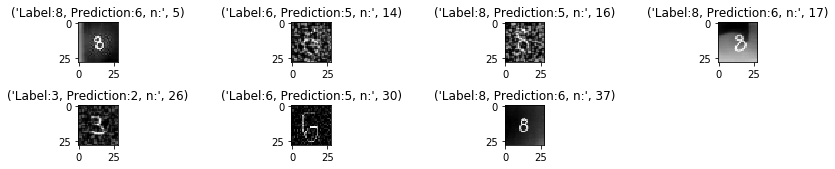

In [143]:
import random
import matplotlib.pyplot as plt

predicted_result = model.predict(newtest_images)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(newtest_newlabels, axis=1)

wrong_result = []
count=0

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
      count=count+1
      wrong_result.append(n)
      
print("count=",count)

count = 0
nrows = 7
ncols = 4

plt.figure(figsize=(12,8))

for n in wrong_result:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(newtest_images[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n]) + ", n:",n
    plt.title(tmp)

plt.tight_layout()
plt.show()